In [1]:

from bayes_window.generative_models import generate_fake_spikes
from bayes_window.model_comparison import *
from bayes_window import BayesWindow, BayesRegression, LMERegression, BayesConditions

In [2]:
df, df_monster, index_cols, firing_rates = generate_fake_spikes(n_trials=140,
                                                                n_neurons=10,
                                                                n_mice=8,
                                                                dur=7, 
                                                               mouse_response_slope=20,
                                                               overall_stim_response_strength=4)

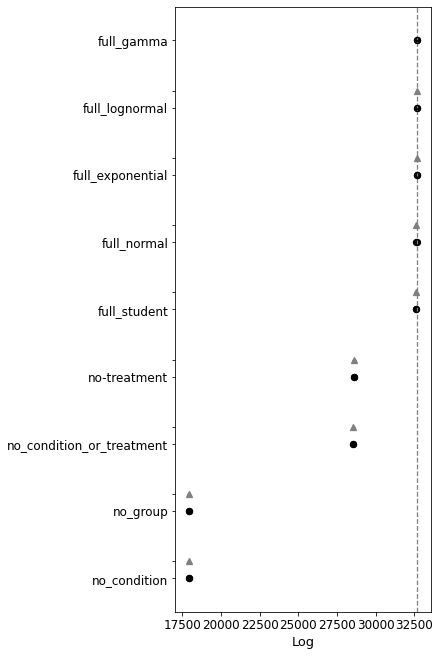

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
full_gamma,0,32682.539769,10.218112,0.000000,2.098871e-01,84.574023,0.000000,False,log
full_lognormal,1,32675.996306,10.075258,6.543463,2.014462e-01,85.727711,120.290167,False,log
full_exponential,2,32674.510397,10.205030,8.029372,2.178374e-01,87.600528,121.822053,False,log
full_normal,3,32626.496626,10.351264,56.043143,1.928634e-01,87.418404,121.445111,False,log
full_student,4,32568.623946,10.514633,113.915823,1.810493e-01,90.958744,123.886180,False,log
no-treatment,5,28590.554648,1.952379,4091.985121,3.801839e-04,76.541851,113.972350,False,log
no_condition_or_treatment,6,28560.210721,1.850343,4122.329048,3.789740e-04,75.967954,113.577487,False,log
no_group,7,17914.078009,0.721915,14768.461760,3.574336e-07,58.466185,102.942507,False,log
no_condition,8,17913.669329,0.738353,14768.870440,0.000000e+00,58.383048,103.637447,False,log


In [3]:
window = BayesRegression(df=df, y='isi', treatment='stim', group='mouse', condition='neuron')
window.fit(model=models.model_hierarchical, do_mean_over_trials=True,)
window.explore_models()

In [4]:
window = LMERegression(df=df, y='isi', treatment='stim', group='mouse', condition='neuron_x_mouse')
window.fit()
window.fit_anova()
window.posterior

Using formula isi ~ (1|mouse) + stim| neuron_x_mouse__0 + stim|neuron_x_mouse__1 + stim|neuron_x_mouse__2 + stim|neuron_x_mouse__3 + stim|neuron_x_mouse__4 + stim|neuron_x_mouse__5 + stim|neuron_x_mouse__6 + stim|neuron_x_mouse__7 + stim|neuron_x_mouse__8 + stim|neuron_x_mouse__9 + stim|neuron_x_mouse__10 + stim|neuron_x_mouse__11 + stim|neuron_x_mouse__12 + stim|neuron_x_mouse__13 + stim|neuron_x_mouse__14 + stim|neuron_x_mouse__15 + stim|neuron_x_mouse__16 + stim|neuron_x_mouse__17 + stim|neuron_x_mouse__18 + stim|neuron_x_mouse__19 + stim|neuron_x_mouse__20 + stim|neuron_x_mouse__21 + stim|neuron_x_mouse__22 + stim|neuron_x_mouse__23 + stim|neuron_x_mouse__24 + stim|neuron_x_mouse__25 + stim|neuron_x_mouse__26 + stim|neuron_x_mouse__27 + stim|neuron_x_mouse__28 + stim|neuron_x_mouse__29 + stim|neuron_x_mouse__30 + stim|neuron_x_mouse__31 + stim|neuron_x_mouse__32 + stim|neuron_x_mouse__33 + stim|neuron_x_mouse__34 + stim|neuron_x_mouse__35 + stim|neuron_x_mouse__36 + stim|neuron_x_m

/home/m/anaconda3/envs/dj/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


                            Coef. Std.Err.        z  P>|z|  [0.025  0.975]
Intercept                   0.081    0.004   21.895  0.000   0.074   0.088
1 | mouse                  -0.004    0.001   -4.460  0.000  -0.005  -0.002
stim | neuron_x_mouse__0   -0.003    0.001   -3.634  0.000  -0.005  -0.001
stim | neuron_x_mouse__1   -0.008    0.001   -9.634  0.000  -0.010  -0.006
stim | neuron_x_mouse__2   -0.010    0.001  -11.919  0.000  -0.012  -0.008
...                           ...      ...      ...    ...     ...     ...
stim | neuron_x_mouse__76   0.003    0.001    3.079  0.002   0.001   0.004
stim | neuron_x_mouse__77  -0.001    0.001   -1.238  0.216  -0.003   0.001
stim | neuron_x_mouse__78  -0.005    0.001   -5.650  0.000  -0.006  -0.003
stim | neuron_x_mouse__79  -0.007    0.001   -8.779  0.000  -0.009  -0.006
Group Var                   0.000    0.002                                

[83 rows x 6 columns]
isi~stim
           sum_sq    df     F  PR(>F)
stim         0.0   1.0  54.1  

,neuron_x_mouse,center interval,Std.Err.,z,p,higher interval,lower interval,zero
0,0,-0.003,0.001,-3.634,0.000,-0.005,-0.001,0
1,1,-0.008,0.001,-9.634,0.000,-0.010,-0.006,0
2,2,-0.010,0.001,-11.919,0.000,-0.012,-0.008,0
3,3,-0.016,0.001,-18.903,0.000,-0.017,-0.014,0
4,4,-0.019,0.001,-22.785,0.000,-0.021,-0.017,0
...,...,...,...,...,...,...,...,...
75,75,0.007,0.001,8.115,0.000,0.005,0.008,0
76,76,0.003,0.001,3.079,0.002,0.001,0.004,0
77,77,-0.001,0.001,-1.238,0.216,-0.003,0.001,0
78,78,-0.005,0.001,-5.650,0.000,-0.006,-0.003,0


In [5]:
window.plot(x='neuron_x_mouse')

alt.LayerChart(...)

In [6]:
window.fit_anova()

isi~stim
           sum_sq    df     F  PR(>F)
stim         0.0   1.0  54.1     0.0
Residual     0.0  14.0   NaN     NaN


True